# Cris Chou
# Textclass2

In [1]:
import numpy as np
import pandas as pd

In [92]:
#Dataset https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification
df = pd.read_csv('../textclass2/data/ecommerceDataset.csv',header=None,names=['Category','Description']).astype(str)
df.shape

(50425, 2)

In [93]:
df.head()

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [94]:
df['Category'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Category, dtype: int64

In [16]:
import seaborn as sb

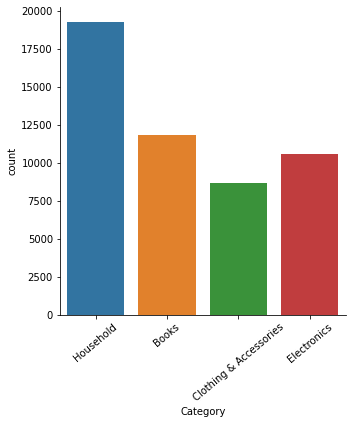

In [95]:
graph = sb.catplot(x='Category', kind='count', data=df)
graph.set_xticklabels(rotation=40)


The dataset is a collection of ecommerce items, and their descriptions. The model should be able to predict the category of each item based on the item description. 

## Building Sequential Model

In [85]:
import tensorflow as tf

In [104]:
from tensorflow import keras
from tensorflow.python.keras import layers, models

In [87]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

## Preprocessing

In [96]:
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]
print("train data size: ", train.shape)
print("test data size: ", test.shape)

train data size:  (40262, 2)
test data size:  (10163, 2)


In [128]:
num_labels = 4
vocab_size = 20000
batch_size = 100

In [129]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.Description)

In [130]:
x_train = tokenizer.texts_to_matrix(train.Description, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.Description, mode='tfidf')

In [131]:
encoder = LabelEncoder()
encoder.fit(train.Category)
y_train = encoder.transform(train.Category)
y_test = encoder.transform(test.Category)

In [132]:
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first five labels:", y_test[:5])

train shapes: (40262, 20000) (40262,)
test shapes: (10163, 20000) (10163,)
test first five labels: [3 3 3 3 3]


In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [134]:
model = models.Sequential()
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='relu'))

In [136]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/30
363/363 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.2617 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/30
363/363 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.2612 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/30
363/363 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.2612 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/30
265/363 [====================>.........] - ETA: 0s - loss: nan - accuracy: 0.2587

KeyboardInterrupt: 

In [107]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

102/102 [==============================] - 0s 4ms/step - loss: -513700.2500 - accuracy: 0.3098
Accuracy:  0.30984944105148315
